In [5]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision.transforms import ToTensor
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import scikitplot as skplt
import torch.nn.functional as F

In [4]:
!pip install scikit-plot==0.3.7

In [6]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5) # ADD THIS LINE
    plt.ylim(len(np.unique(y))-0.5, -0.5) # ADD THIS LINE
    return ax



In [7]:
input_features = pd.read_csv("results.csv")
original_input_features = input_features[['original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Mean',
 'original_firstorder_Median',
 'original_firstorder_Minimum',
 'original_firstorder_Range',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_Skewness',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance',
 'original_glcm_Autocorrelation',
 'original_glcm_JointAverage',
 'original_glcm_ClusterProminence',
 'original_glcm_ClusterShade',
 'original_glcm_ClusterTendency',
 'original_glcm_Contrast',
 'original_glcm_Correlation',
 'original_glcm_DifferenceAverage',
 'original_glcm_DifferenceEntropy',
 'original_glcm_DifferenceVariance',
 'original_glcm_JointEnergy',
 'original_glcm_JointEntropy',
 'original_glcm_Imc1',
 'original_glcm_Imc2',
 'original_glcm_Idm',
 'original_glcm_Idmn',
 'original_glcm_Id',
 'original_glcm_Idn',
 'original_glcm_InverseVariance',
 'original_glcm_MaximumProbability',
 'original_glcm_SumEntropy',
 'original_glcm_SumSquares',
 'original_glrlm_GrayLevelNonUniformity',
 'original_glrlm_GrayLevelNonUniformityNormalized',
 'original_glrlm_GrayLevelVariance',
 'original_glrlm_HighGrayLevelRunEmphasis',
 'original_glrlm_LongRunEmphasis',
 'original_glrlm_LongRunHighGrayLevelEmphasis',
 'original_glrlm_LongRunLowGrayLevelEmphasis',
 'original_glrlm_LowGrayLevelRunEmphasis',
 'original_glrlm_RunEntropy',
 'original_glrlm_RunLengthNonUniformity',
 'original_glrlm_RunLengthNonUniformityNormalized',
 'original_glrlm_RunPercentage',
 'original_glrlm_RunVariance',
 'original_glrlm_ShortRunEmphasis',
 'original_glrlm_ShortRunHighGrayLevelEmphasis',
 'original_glrlm_ShortRunLowGrayLevelEmphasis',
 'original_glszm_GrayLevelNonUniformity',
 'original_glszm_GrayLevelNonUniformityNormalized',
 'original_glszm_GrayLevelVariance',
 'original_glszm_HighGrayLevelZoneEmphasis',
 'original_glszm_LargeAreaEmphasis',
 'original_glszm_LargeAreaHighGrayLevelEmphasis',
 'original_glszm_LargeAreaLowGrayLevelEmphasis',
 'original_glszm_LowGrayLevelZoneEmphasis',
 'original_glszm_SizeZoneNonUniformity',
 'original_glszm_SizeZoneNonUniformityNormalized',
 'original_glszm_SmallAreaEmphasis',
 'original_glszm_SmallAreaHighGrayLevelEmphasis',
 'original_glszm_SmallAreaLowGrayLevelEmphasis',
 'original_glszm_ZoneEntropy',
 'original_glszm_ZonePercentage',
 'original_glszm_ZoneVariance']]

In [8]:
normalized_df=(original_input_features-original_input_features.mean())/original_input_features.std()
normalized_df.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance
0,-0.666089,-0.231588,-0.062871,0.735072,0.432398,-0.426793,0.092516,0.405379,-0.615686,-0.709659,...,-0.099173,-0.400192,-0.327913,-1.585846,-1.664506,-0.606888,-0.684267,1.045467,-0.499621,-0.104014
1,-0.578095,-1.517206,-0.263500,-1.248924,-1.276448,-0.341963,-1.846960,-1.634193,-1.141716,-1.053343,...,-0.110320,0.973585,-0.501190,-0.877703,-0.821587,-1.671904,1.261333,-1.613512,-0.034525,-0.104201
2,-0.622092,-0.524080,-0.283411,0.276127,-0.076564,-0.281625,-0.462375,-0.122580,-0.619277,-0.639993,...,-0.116375,0.384715,-0.481904,0.878783,0.834547,-0.207904,0.150462,-1.122725,1.650846,-0.104464
3,-0.354726,0.007488,0.564613,0.689698,0.348010,-0.454692,0.198209,0.306012,-0.356860,-0.505306,...,-0.118485,-0.567314,0.735286,-0.734865,-0.655529,-0.333554,-0.656915,1.130329,-0.072854,-0.103984
4,1.093786,0.640184,-0.195762,-0.388872,-0.263799,-0.048176,0.235202,-0.235861,1.021571,1.115583,...,-0.106908,-0.656372,0.038311,0.220707,0.288239,0.272257,-0.714476,0.306466,-0.835561,-0.092169


Solid                168
Part-solid            25
Pure ground glass     11
Peri-cystic            7
Semiconsolidation      7
Name: Nodule Consistency, dtype: int64

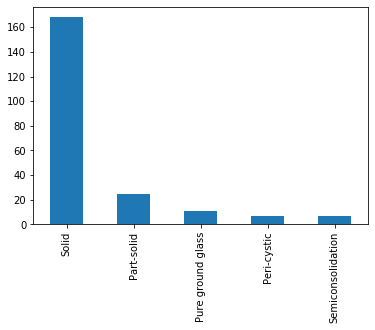

In [9]:
targets = pd.read_csv("NLST_data_processed_latest (1).csv")
targets = targets[["Nodule Consistency", "Nodule Margins"]]
Consistency = targets[["Nodule Consistency"]]
Consistency["Nodule Consistency"].value_counts().plot(kind='bar')
Consistency["Nodule Consistency"].value_counts()

In [10]:
targets.loc[targets["Nodule Consistency"] != "Solid", "Nodule Consistency"] = "Not Solid"
targets.loc[targets["Nodule Margins"] != "Smooth", "Nodule Margins"] = "Not Smooth"
targets["Nodule Consistency"] = targets["Nodule Consistency"].map(lambda x: 1.0 if x == "Solid" else 0.0)
targets["Nodule Margins"] = targets["Nodule Margins"].map(lambda x: 1.0 if x == "Smooth" else 0.0)

In [11]:
features = normalized_df
target = targets['Nodule Consistency']

In [12]:
#5 Fold Cross-validate
kf = StratifiedKFold(5, shuffle=True, random_state=42)

In [13]:
x = features.values
y = target.values
x = np.array(x)
y = np.array(y)

In [14]:
x

array([[-0.66608853, -0.23158802, -0.0628713 , ...,  1.04546652,
        -0.49962074, -0.10401418],
       [-0.57809479, -1.51720613, -0.26350012, ..., -1.61351167,
        -0.03452509, -0.10420092],
       [-0.62209166, -0.5240804 , -0.28341051, ..., -1.12272484,
         1.65084631, -0.10446353],
       ...,
       [ 0.58409935,  0.50586617, -0.28787783, ..., -0.5389437 ,
         0.11603436, -0.10382006],
       [-1.49458336, -0.44369686, -0.11399223, ...,  0.48593096,
         0.38476627, -0.10419669],
       [-0.42241358, -0.31404598,  0.27829946, ...,  1.41118879,
        -0.44823789, -0.10386192]])

In [15]:
y

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.])

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print('Using {} device'.format(device))

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(72, 512),
            nn.ReLU(),
            nn.Linear(512, 250),
            nn.ReLU(),
            nn.Linear(250, 100),
            nn.ReLU(),
            nn.Linear(100, 2),
#             nn.Softmax(dim=1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits



Using cuda device


In [17]:
targets['Nodule Consistency'].values

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.])

In [18]:
oos_y = []
oos_pred = []
fold = 0

x = torch.tensor(features.values, dtype=torch.float32)
y = torch.tensor(targets['Nodule Consistency'].values, dtype=torch.long)


for train, test in kf.split(x, target):
    fold += 1
    print(f"Fold #{fold}")
    
    model = NeuralNetwork().to(device)
    ##print(model)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    
    x_train = x[train]
    x_test = x[test]
    
    y_train = y[train]
    y_test = y[test]

    x_train, x_test, y_train, y_test = x_train.to(device), x_test.to(device), y_train.to(device), y_test.to(device)
    # Training loop
    EPOCHS = 50
    epoch = 0
   

    while epoch < EPOCHS:
        epoch += 1
        model.train()
        optimizer.zero_grad()
        output = model(x_train)
#         print(output)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

        # Evaluate validation loss
        model.eval()
        with torch.no_grad():
            y_val = model(x_test)
            val_loss = criterion(y_val, y_test)

    # Prediction
    with torch.no_grad():
        y_val = model(x_test)
        ##softmax
        output = F.softmax(y_val, dim=1)
        _, pred = torch.max(output, 1)
        ##print(torch.max(output, 1))
    oos_y.append(y_test.cpu().numpy())
    oos_pred.append(pred.cpu().numpy())

    print(
        f"Epoch {epoch}/{EPOCHS}, Validation Loss: " f"{val_loss.item()}"
    )

    # Measure this fold's accuracy
    score = metrics.accuracy_score(y_test.cpu().numpy(), pred.cpu().numpy())
    print(f"Fold accuracy: {score}")
    auc = metrics.roc_auc_score(y_test.cpu().numpy(), pred.cpu().numpy())
    print(f"Fold AUC: {auc}")

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)

# print(oos_y)
# print(oos_pred)

Fold #1
Epoch 50/50, Validation Loss: 1.2546954154968262
Fold accuracy: 0.7045454545454546
Fold AUC: 0.6323529411764706
Fold #2
Epoch 50/50, Validation Loss: 0.6947136521339417
Fold accuracy: 0.9318181818181818
Fold AUC: 0.85
Fold #3
Epoch 50/50, Validation Loss: 1.2799485921859741
Fold accuracy: 0.7727272727272727
Fold AUC: 0.6058823529411765
Fold #4
Epoch 50/50, Validation Loss: 0.9337743520736694
Fold accuracy: 0.8604651162790697
Fold AUC: 0.7348484848484849
Fold #5
Epoch 50/50, Validation Loss: 0.11190930008888245
Fold accuracy: 0.9534883720930233
Fold AUC: 0.9348484848484848


# Evaluation

In [19]:

score = metrics.accuracy_score(oos_y, oos_pred)
print(f"Final accuracy: {score}")
auc = metrics.roc_auc_score(oos_y, oos_pred)
print(f"Final AUC: {auc}")
classification_report = metrics.classification_report(oos_y, oos_pred)
print(classification_report)

Final accuracy: 0.8440366972477065
Final AUC: 0.7513095238095239
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        50
           1       0.88      0.92      0.90       168

    accuracy                           0.84       218
   macro avg       0.79      0.75      0.77       218
weighted avg       0.84      0.84      0.84       218



In [20]:
#compute the confusion matrix.
cm = metrics.confusion_matrix(oos_y, oos_pred)
print(cm)


[[ 29  21]
 [ 13 155]]


Confusion matrix, without normalization
[[ 29  21]
 [ 13 155]]


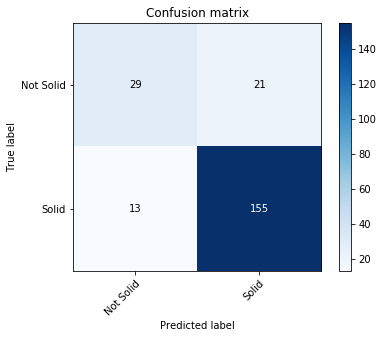

In [21]:
class_names = np.array(['Not Solid','Solid'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(oos_y, oos_pred, classes=class_names,
                      title='Confusion matrix')
plt.show()

In [22]:
torch.save(model.state_dict(), "MLP_kfold_consistency.pth")
print("Saved PyTorch Model State to MLP_kfold_consistency.pth")

Saved PyTorch Model State to MLP_kfold_consistency.pth


In [23]:
model.state_dict()

OrderedDict([('linear_relu_stack.0.weight',
              tensor([[ 0.0839, -0.0493, -0.0188,  ..., -0.0616,  0.1090, -0.1030],
                      [-0.0087, -0.0549,  0.0395,  ..., -0.1108,  0.0478,  0.0540],
                      [-0.1232,  0.1080,  0.1186,  ...,  0.0375, -0.0380, -0.0429],
                      ...,
                      [ 0.0670, -0.0593,  0.0109,  ...,  0.0556,  0.0207, -0.0506],
                      [ 0.0149,  0.0239,  0.0351,  ...,  0.0819,  0.0032,  0.0794],
                      [ 0.0507, -0.0847, -0.0656,  ..., -0.0211,  0.1108, -0.0160]],
                     device='cuda:0')),
             ('linear_relu_stack.0.bias',
              tensor([-2.7904e-02,  5.2750e-02, -6.1556e-02,  1.6203e-02,  1.0690e-01,
                       3.7473e-02,  2.4774e-02, -7.1062e-02,  1.1564e-01, -7.3280e-02,
                       3.7044e-02, -9.2400e-02,  9.2757e-03,  1.1903e-01, -9.4495e-02,
                       4.2708e-02, -5.4950e-02,  1.1682e-01,  1.1848e-01, -8.2482